### Получение данных


In [ ]:
#импортируем сразу все библиотеки, которые нам могут понадобиться

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
# посмотрим на общее описание числовых данных
# помним, что

#count     # количество наблюдений в наборе данных
#mean      # среднее арифметическое
#std       # стандартное отклонение
#min       # минимальное значение
#25%       # первый квартиль
#50%       # медиана, или второй квартиль
#75%       # третий квартиль
#max       # максимальное значение
#dtype:    # тип данных


data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


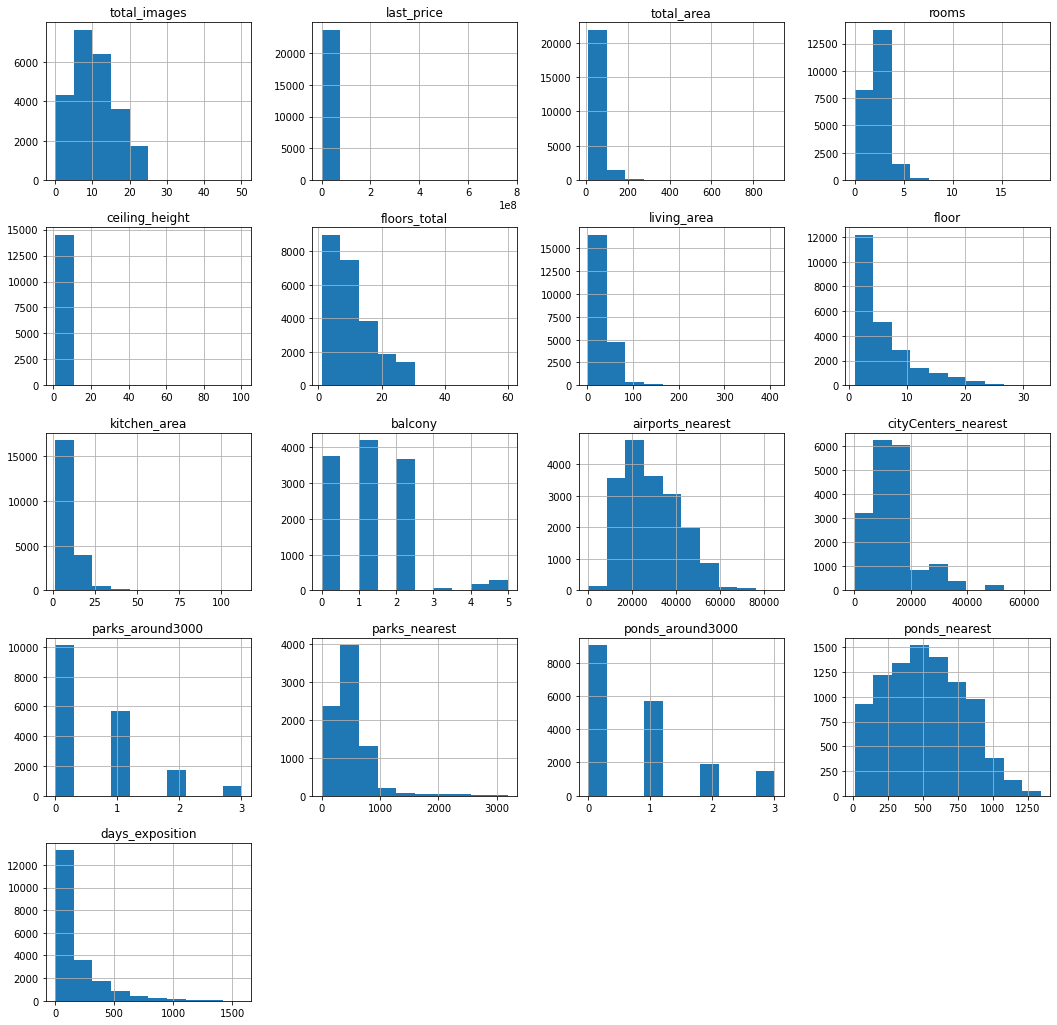

In [ ]:
#построим гистрограмму для всех столбцов датафрейма

data.hist(figsize=(18, 18))
plt.show()




```
# Выбран кодовый формат
```

### Предобработка данных

In [ ]:
#выведем количество пропущенных значений для каждого столбца

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
# проверим на наличие дубликатов

data.duplicated().sum()

0

Посмотрим, что можно сделать с пропусками в разных столбцах:


ceiling_height - высота потолков в м - заполним с учетом максимальной и минимальной высоты
living_area - жилая площадь в квадратных метрах (м²) - заполним с помощью соотношения общей площади к известным данным
is_apartment   -  апартаменты (булев тип) -            заменим тип данных на bool
kitchen_area - площадь кухни в квадратных метрах (м²) - заполним с помощью соотношения общей площади к известным данным
balcony - число балконов -                             заменить на  0
locality_name - название населённого пункта         - оставим так, нет объективных данных для заполнения
airports_nearest - расстояние до ближайшего аэропорта в метрах (м) - оставим так,нет объективных данных для заполнения
cityCenters_nearest  - расстояние до центра города (м)   -  оставим так, нет объективных данных для заполнения
parks_around3000 - число парков в радиусе 3 км    -    оставим таr, нет объективных данных для заполнения    
parks_nearest - расстояние до ближайшего парка (м)  -  оставим так, нет объективных данных для заполнения          
ponds_around3000  - число водоёмов в радиусе 3 км   -  оставим так, нет объективных данных для заполнения   
ponds_nearest  - расстояние до ближайшего водоёма (м)     -  оставим так, нет объективных данных для заполнения
days_exposition - сколько дней было размещено объявление (от публикации до снятия)  - оставим так     


In [ ]:
# заполним кол-во пропущенных значений на 0 в столбце balcony, скорее всего их не указали в связи с отсутствием
# проверим, что количество балконов осталось прежним, где было указано, заменилось на 0, где отсутствовало,
# а все пропуски заполнены

data['balcony'] = data['balcony'].fillna(0)
display(data['balcony'].head(20))
data['balcony'].isna().sum()

0     0.0
1     2.0
2     0.0
3     0.0
4     0.0
5     0.0
6     1.0
7     2.0
8     0.0
9     2.0
10    0.0
11    1.0
12    0.0
13    1.0
14    0.0
15    1.0
16    0.0
17    1.0
18    1.0
19    0.0
Name: balcony, dtype: float64

0

In [ ]:
# в столбце is_apartment значения заполнены булевым типом данных, апартаменты (булев тип), заменим тип данных на bool
# проверим, что все пропуски заполнены

data['is_apartment'] = data['is_apartment'].astype('bool')
display(data['is_apartment'].head(20))
data['balcony'].isna().sum()


0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: is_apartment, dtype: bool

0

In [ ]:
#заполним пропуски в столбце living_area - жилая площадь в квадратных метрах (м²)

#создадим новую переменную, которая сохранит все значения столбца с жилой площадью, не больше 0

living_area_Nan = data[~(data['living_area'] > 0)]['living_area']
#display(living_area_Nan)


In [ ]:
#и переменную, которая сохранит все значения столбца с жилой площадью, отличной от 0

living_area_norm = data[(data['living_area'] > 0)]['living_area']


In [ ]:
#найдем соотношение средней общей площади к средней жилой площади там, где значения имеются - оно равно 1,74

a = data['total_area'].mean() / living_area_norm.mean()

In [ ]:
data['living_area']

0        51.0
1        18.6
2        34.3
3         NaN
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697     NaN
23698    12.3
Name: living_area, Length: 23699, dtype: float64

In [ ]:
# напишем цикл, который пройдется по всем значениям столбца жилой площади, и если они Nan, 0 или отрицательные,
# их заменят на соотношение 1,74

#for index in range(len(data['living_area'])):
    #if (~(data['living_area'][index] > 0)):
        #data['living_area'][index] = data['total_area'][index] / a

data['living_area']=data['living_area'].fillna(data['total_area']/a)
display(data['living_area'].head(10))

0    51.000000
1    18.600000
2    34.300000
3    90.785766
4    32.000000
5    14.400000
6    10.600000
7    40.882144
8    15.430000
9    43.600000
Name: living_area, dtype: float64

In [ ]:
# проверим, что все пропуски заполнены

data['living_area'].isna().sum()

0

In [ ]:
# аналогично заполним пропуски в столбце kitchen_area - площадь кухни в квадратных метрах (м²)
#создадим новую переменную, которая сохранит все значения столбца с площадью кухни, не больше 0

kitchen_area_Nan = data[~(data['kitchen_area'] > 0)]['kitchen_area']
#display(kitchen_area_Nan)


In [ ]:
#и переменную, которая сохранит все значения столбца с кухни площадью, отличной от 0

kitchen_area_norm = data[(data['kitchen_area'] > 0)]['kitchen_area']
#display(kitchen_area_norm)

In [ ]:
#найдем соотношение средней общей площади к плоащиди кухни там, где значения имеются - оно равно 5,7

b = data['total_area'].mean() / kitchen_area_norm.mean()
display(b)

5.709531864143031

In [ ]:
# напишем цикл, который пройдется по всем значениям столбца площади кухни, и если они Nan, 0 или отрицательные,
# их заменят на соотношение 5,7

#for index in range(len(data['kitchen_area'])):
    #if (~(data['kitchen_area'][index] > 0)):
        #data['kitchen_area'][index] = data['total_area'][index] / b

data['kitchen_area']=data['kitchen_area'].fillna(data['total_area']/b)
display(data['kitchen_area'].head(10))

0    25.000000
1    11.000000
2     8.300000
3    27.848168
4    41.000000
5     9.100000
6    14.400000
7    18.900000
8     8.810000
9     6.500000
Name: kitchen_area, dtype: float64

In [ ]:
# проверим, что все пропуски заполнены

display(data['kitchen_area'].isna().sum())
display(data['kitchen_area'].head(20))

0

0     25.000000
1     11.000000
2      8.300000
3     27.848168
4     41.000000
5      9.100000
6     14.400000
7     18.900000
8      8.810000
9      6.500000
10     8.500000
11     6.000000
12     9.000000
13     5.200000
14     8.000000
15     7.600000
16     9.000000
17    11.000000
18     5.600000
19    12.000000
Name: kitchen_area, dtype: float64

In [ ]:
# создадим новый столбец, который покажет разницу общей площади и суммы площадей жилой и кухни
# уберем все строки, где это значение неверное, оставив малую погрешность

data['area_check'] = data['total_area'] - data['living_area'] - data['kitchen_area']
data = data.loc[data['area_check'] > -0.1]
display(data[data['area_check'] < 0]['area_check'])

2296    -1.776357e-15
4930    -2.835128e-02
6432    -2.835128e-02
8455    -1.053576e-02
12634   -1.421085e-14
22399   -3.552714e-15
Name: area_check, dtype: float64

In [ ]:
#ceiling_height - высота потолков в м
#посмотрим на минимальное, максимальное и медианное значение через describe()
# заполним медианным значением пропуски


display(data['ceiling_height'].describe())
display(data['ceiling_height'].isna().sum())

count    14441.000000
mean         2.767748
std          1.230053
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

9142

In [ ]:
display('Минимальная высота потолков составляет: ', data['ceiling_height'].min())
display('Максимальная высота потолков составляет: ', data['ceiling_height'].max())

'Минимальная высота потолков составляет: '

1.0

'Максимальная высота потолков составляет: '

100.0

In [ ]:
#пропуски в высоте квартир составляют 38% от всех данных, это очень много, удалять нельзя

height_na = data['ceiling_height'].isna().sum()
height_total = len(data['ceiling_height'])

p = 100.0 * height_na / height_total
display('Процент пропущенных значений высоты потолков: ', p)

'Процент пропущенных значений высоты потолков: '

38.76521222914811

In [ ]:
#попробуем привести в порядок выбивающиеся значения - если высота потолка больше или равна 10м - разделим на 10
#если высота потолка меньше или равна 2 м - пока запишем как Nan

data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data[data['ceiling_height'] >= 10]['ceiling_height']/10
data.loc[data['ceiling_height'] <= 2, 'ceiling_height'] = np.nan

#фактически мы убрали всего лишь один метровый потолок, одно минимальное значение

In [ ]:
#напишем цикл, который в случае нахождения пропуска заменит его на медианное значение

median = data['ceiling_height'].median()
data['ceiling_height']=data['ceiling_height'].fillna(median)


#for index in range(len(data['ceiling_height'])):
#    if (~(data['ceiling_height'][index] > 0)):
#        data['ceiling_height'][index] = median


In [ ]:
#проверим полученную таблицу с данными по потолкам, наличие пропусков

display(data['ceiling_height'].head(20))

display(data['ceiling_height'].describe())
display(data['ceiling_height'].isna().sum())

0     2.70
1     2.65
2     2.65
3     2.65
4     3.03
5     2.65
6     2.65
7     2.65
8     2.65
9     2.50
10    2.67
11    2.65
12    2.65
13    2.56
14    2.65
15    2.65
16    3.05
17    2.65
18    2.50
19    2.75
Name: ceiling_height, dtype: float64

count    23583.000000
mean         2.698113
std          0.235162
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

0

Возможные причины пропуска в данных.

Обычно причинами пропуска в данных являются человеческий фактор, технический сбой, появление пропусков может быть связано со значениями в других столбцах либо пропуск зависит от значений собственного столбца.

На основании полученных данных, можно сделать вывод о том, что пропуски в столбцах связаны с:

со значениями собственного столбца:

is_apartment  -  апартаменты (булев тип) - не заполняется, потому что нет четких рекомендаций при заполнении формы - указывать ли значение либо оставлять пропуск, возможно необходимо дополнить форму столбцом с выбором одного обязательного значения из перечисленных;

со значениями других столбцов:

в столбце balcony скорее всего не указали количество балконов в связи с их отсутствием, однако, этого нельзя точно утверждать, потому как и в однокомнатных квартирах бывают балконы, так и весь дом может быть без балконов, при том, что там есть разные планировки, как 1-2-3-4-комнатные квартиры, но все без балконов. Возможно, необходимо дополнить форму столбцом с выбором обязательного числового значения балконов, в котором будет присутствовать и 0 как значение.


в столбцах living_area (жилая площадь) и kitchen_area (площадь кухни) площадь значений однозначно будет меньше общей площади квартиры, здесь, скорее всего, человек не располагает при заполнении точными сведениями, поэтому предпочитает оставить это поле пустым, тогда как можно предложить ему вариант площади, рассчитанный по медиане заполненных значений.

так и в столбце ceiling_height (высота потолков) - аналогичная ситуация, возможно, будет уместным добавить в форму минимальное значение 2м, значение, утвержденное в регионе по СанПину, максимальное значение в 4м или графу иное с числовым форматом, где человеком будут указаны какие-то нестандартные варианты.

столбцы locality_name (наименование населенного пункта),
airports_nearest (расстояние до ближайшего аэропорта),
cityCenters_nearest (расстояние до центра города),
parks_around3000 (число парков в радиусе 3 км),
parks_nearest (расстояние до ближайшего парка),
ponds_around3000 (число водоёмов в радиусе 3 км),
ponds_nearest (расстояние до ближайшего водоёма) - географические, здесь возможна привязка к карте, на которой будет нанесены все указанные объекты, для автоматического рассчета показателей исходя из заполненного адреса (адреса тоже при этом придется выбирать только из имеющегося списка), потому что при заполнении объявления человеку самостоятельно очень долго рассчитывать по карте такие значения и проще пропустить, однако, на ценник квадратного метра данные показатели могут влиять.

в стоблце days_exposition (сколько дней было размещено объявление (от публикации до снятия) - скорее всего пропуски связаны с техническим сбоем, потому что форма заполняется автоматически, очень сомнительно, что при снятии объявления продавца спрашивают, сколько дней он продавал квартиру и имеется возможность поставить рандомное число. Поэтому необходимо выяснить у отдела разработки причины такого технического сбоя.



Проверим, в каких столбцах необходимо заменить тип данных и почему:


first_day_exposition — дата публикации - указан тип данных int64  - заменим на datetime - чтобы разделить дату и время;

days_exposition — сколько дней было размещено объявление (от публикации до снятия) - заменим на datetime - чтобы разделить дату и время;

floors_total - всего этажей в доме - указан тип данных float64 - заменим на int64 - число этажей не может быть не целым

balcony - количество балконов - указан тип данных float64 - заменим на int64 - число этажей не может быть не целым

is_apartment  - апартаменты(булев тип) - указан тип данных object - заменим на bool - позволит выбрать из двух вариантов


In [ ]:
# Заменим вещественный тип данных в столбце floors_total, balcony на целочисленный с помощью метода astype()

# в стоблце floors_total заменим на целые число, но в этом столбце есть пропуски, сразу на целочисленный не заменить

pd.to_numeric(data['floors_total'], downcast ='signed')



0        16.0
1        11.0
2         5.0
3        14.0
4        14.0
         ... 
23694     5.0
23695     5.0
23696     3.0
23697    17.0
23698     5.0
Name: floors_total, Length: 23583, dtype: float64

In [ ]:
#в столбце floors_total всего 86 пропущенных значений их 23 тысяч, то есть всего 0,3 процента
#их можно удалить и затем заменить на целочисленный формат

data = data.dropna(subset=['floors_total'])

data['floors_total'] = data['floors_total'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23497 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23497 non-null  int64  
 1   last_price            23497 non-null  float64
 2   total_area            23497 non-null  float64
 3   first_day_exposition  23497 non-null  object 
 4   rooms                 23497 non-null  int64  
 5   ceiling_height        23497 non-null  float64
 6   floors_total          23497 non-null  int64  
 7   living_area           23497 non-null  float64
 8   floor                 23497 non-null  int64  
 9   is_apartment          23497 non-null  bool   
 10  studio                23497 non-null  bool   
 11  open_plan             23497 non-null  bool   
 12  kitchen_area          23497 non-null  float64
 13  balcony               23497 non-null  float64
 14  locality_name         23449 non-null  object 
 15  airports_nearest   

In [ ]:
# в стоблце balcony аналогично заменим значения на целые цисла datetime64, возможно,
# когда-то понадобится посчитать не только сколько дней, но и сколько часов висело объявление

data['balcony'] = data['balcony'].astype(int)


In [ ]:
# в столбце first_day_exposition аналогично заменим тип данных на datetime, возможно, когда-то посчитаем и часы

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')


In [ ]:
# в столбце is_apartment заменим тип данных на bool

data['is_apartment'] = data['is_apartment'].astype(bool)

In [ ]:
#выведем итоговую таблицу и еще раз все проверим

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23497 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23497 non-null  int64         
 1   last_price            23497 non-null  float64       
 2   total_area            23497 non-null  float64       
 3   first_day_exposition  23497 non-null  datetime64[ns]
 4   rooms                 23497 non-null  int64         
 5   ceiling_height        23497 non-null  float64       
 6   floors_total          23497 non-null  int64         
 7   living_area           23497 non-null  float64       
 8   floor                 23497 non-null  int64         
 9   is_apartment          23497 non-null  bool          
 10  studio                23497 non-null  bool          
 11  open_plan             23497 non-null  bool          
 12  kitchen_area          23497 non-null  float64       
 13  balcony         

In [ ]:
# изучим уникальные значения в стоблце с названиями

data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
# есть пропуски, их всего 49 из 23 тысяч, можно удалить

data = data.dropna(subset=['locality_name'])

In [ ]:
# не будем удалять все виды населенных пунктов, хотя где-то они и отсутствуют, единообразия нет,
# эту проблему можно доработать после привязки к карте, пока это информация как минимум о количестве жителей в населенном пункте
# что может нам помочь в дальнейшем анализе за
# но заменим видимые ё на е

data['locality_name'] = data['locality_name'].str.replace('ё','е',regex=True)
replace_list = ['городской поселок', 'поселок городского типа']
for i in replace_list:
    data['locality_name'] = data['locality_name'].str.replace(i,'поселок')


In [ ]:
# найдем и устраним редкие и выбивающиеся значения
# со столбцом ceiling_height (высота потолков) мы работали выше, поэтому теперь значения в пределах разумных

display(data.describe())



,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_check
count,23449.000000,2.344900e+04,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,17959.000000,17982.000000,17983.000000,7996.000000,17983.000000,8994.000000,20290.000000,23449.000000
mean,9.881999,6.537338e+06,60.375024,2.073010,2.698136,10.664677,34.556989,5.870314,10.485274,0.592520,28805.349964,14199.048048,0.611077,490.981116,0.768782,518.173004,180.947215,15.332761
std,5.680600,1.088518e+07,35.665793,1.077059,0.235512,6.586687,22.330820,4.864904,6.005057,0.960396,12631.406497,8616.306380,0.801229,341.272695,0.937859,277.989446,219.930139,12.191689
min,0.000000,1.219000e+04,13.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,-0.028351
25%,6.000000,3.420000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18574.500000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000,9.300000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26764.000000,13094.500000,0.000000,455.000000,1.000000,503.000000,95.000000,12.600000
75%,14.000000,6.799000e+06,69.750000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37274.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,232.000000,17.700000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,378.300000


In [ ]:
# в столбце rooms (количество комнат) есть значения, равные 0, такого кол-ва комнат быть не может, заменим на 1

data['rooms'] = data['rooms'].replace(0.0, 1.0)

display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_check
count,23449.000000,2.344900e+04,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,17959.000000,17982.000000,17983.000000,7996.000000,17983.000000,8994.000000,20290.000000,23449.000000
mean,9.881999,6.537338e+06,60.375024,2.080558,2.698136,10.664677,34.556989,5.870314,10.485274,0.592520,28805.349964,14199.048048,0.611077,490.981116,0.768782,518.173004,180.947215,15.332761
std,5.680600,1.088518e+07,35.665793,1.065951,0.235512,6.586687,22.330820,4.864904,6.005057,0.960396,12631.406497,8616.306380,0.801229,341.272695,0.937859,277.989446,219.930139,12.191689
min,0.000000,1.219000e+04,13.000000,1.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,-0.028351
25%,6.000000,3.420000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18574.500000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000,9.300000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26764.000000,13094.500000,0.000000,455.000000,1.000000,503.000000,95.000000,12.600000
75%,14.000000,6.799000e+06,69.750000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37274.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,232.000000,17.700000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,378.300000


In [ ]:
# в столбце living_area (жилая площадь) есть минимальное значение в 2м, посмотрим, сколько строчек во всем датафрейме с
# с минимальной жилой площадью в 7м (меньшем, чем для студий)

data['living_area'].sort_values()


13915      2.000000
21758      2.000000
3242       3.000000
23574      3.000000
17582      5.000000
            ...    
4237     332.000000
12401    347.500000
3117     360.288168
5358     409.000000
19540    409.700000
Name: living_area, Length: 23449, dtype: float64

In [ ]:
# таких строк всего 8, можно их удалить

data = data.loc[data['living_area'] >= 7.0]


Редкие и выбивающиеся значения, которые были обнаружены.

В столбце с видами населенных пунктов не хватает единообразия или  привязки к встроенной карте, заменили ё на е для улучшения читаемости  + чтобы анализировать эти виды поселков как одинаковые.

В столбце высота потолков значения приведены к разумным, если высота потолка была больше или равна 10м - разделили значения на на 10, скорее всего техническая ошибка, если высота потолка была меньше или равна 2 м  - записали как Nan и удалили, потому что точная информация неизвестна, а имеющаяся противоречит здравому смыслу.

В столбце количество комнат были значения, равные 0, такого кол-ва комнат быть не может, заменили на 1.

В столбце жилая площадь были минимальные значения в 2 м, проверили, сколько строчек до разумного минимума жилой площади студии в 7 м, таких строчек оказалось всего 8, их удалили.



In [ ]:
# Добавим в статью новые столбцы

#цена одного квадратного метра

a = data['last_price'] / data['living_area']
display(a)

data['metre_price'] = a
display(data)

display(data['metre_price'].head(10))


#last_price — цена на момент снятия с публикации / living_area — жилая площадь в квадратных метрах (м²)

#таблица['новый столбец с категорией'] = таблица.apply(название функции, axis=1)


0        254901.960784
1        180107.526882
2        151486.880466
3        714869.770085
4        312500.000000
             ...      
23694    132332.878581
23695     81578.947368
23696     84175.084175
23697    261850.658194
23698    109756.097561
Length: 23441, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_check,metre_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,True,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,32.000000,254901.960784
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,True,...,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,10.800000,180107.526882
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,True,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,13.400000,151486.880466
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.785766,9,True,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,40.366066,714869.770085
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,True,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,27.000000,312500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.300000,3,True,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,46.680000,132332.878581
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.000000,4,True,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,12.500000,81578.947368
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.700000,1,True,...,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.069238,84175.084175
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,43.822689,12,True,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,9.627311,261850.658194


0    254901.960784
1    180107.526882
2    151486.880466
3    714869.770085
4    312500.000000
5    200694.444444
6    349056.603774
7    193605.306532
8    187945.560596
9    123853.211009
Name: metre_price, dtype: float64

In [ ]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['weekday'] = data['first_day_exposition'].dt.weekday
print(data['weekday'])


0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23441, dtype: int64


In [ ]:
#месяц публикации объявления

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['month'] = data['first_day_exposition'].dt.month
display(data['month'])

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23441, dtype: int64

In [ ]:
#год публикации объявления

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['year'] = data['first_day_exposition'].dt.year
display(data['year'])

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23441, dtype: int64

In [ ]:
#тип этажа квартиры

def floor_type(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'ошибка!'

data['floor_type'] = data.apply(floor_type, axis=1)
display(data['floor_type'].head(10))
display(data['floor'].head(10))
display(data['floors_total'].head(10))

0    другой
1    первый
2    другой
3    другой
4    другой
5    другой
6    другой
7    другой
8    другой
9    другой
Name: floor_type, dtype: object

0     8
1     1
2     4
3     9
4    13
5     5
6     6
7    22
8    26
9     7
Name: floor, dtype: int64

0    16
1    11
2     5
3    14
4    14
5    12
6    26
7    24
8    27
9     9
Name: floors_total, dtype: int64

In [ ]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).round(0)
display(data['cityCenters_km'])



0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_km, Length: 23441, dtype: float64

### Проведем исследовательский анализ данных

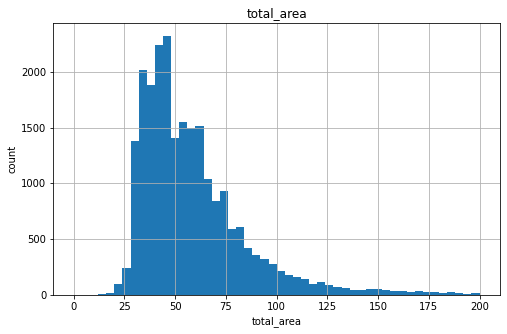

count    23441.000000
mean        60.377771
std         35.665058
min         13.000000
25%         40.000000
50%         52.000000
75%         69.750000
max        900.000000
Name: total_area, dtype: float64

In [ ]:
# Изучим следующие параметры объектов и построим гистрограммы для каждого из них:

# общая площадь


data['total_area'].hist(figsize=(8, 5), bins=50, range=(0, 200))

# Добавим подписи к графику
plt.title('total_area')
plt.xlabel('total_area')
plt.ylabel('count')

plt.show()

F(data['total_area'].describe())


В целом на гистограмме общей площади объектов видно, что распределение нормальное, большинство объектов расположены в пределах 40-60 кв.м., объектов до 20 кв.м. очень мало, как и свыше 100 кв.м.

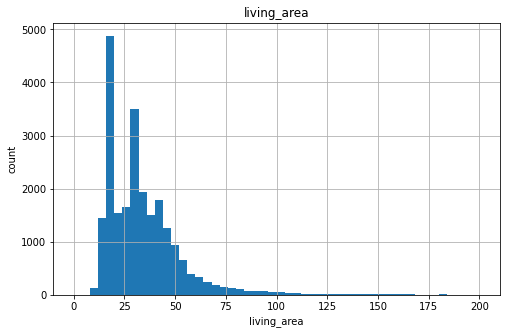

count    23441.000000
mean        34.567379
std         22.327523
min          7.422736
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [ ]:
# жилая площадь


data['living_area'].hist(figsize=(8, 5), bins=50, range=(0, 200))

# Добавим подписи к графику
plt.title('living_area')
plt.xlabel('living_area')
plt.ylabel('count')

plt.show()

display(data['living_area'].describe())


В столбце жилой площади распределение также нормальное, есть значительные выбросы в районе 20 кв.м. и 35 кв.м., что в целом совпадает с медианой, маленьких жилых площадей, до 10 кв.м., в объявлениях очень мало, в том числе и потому, что мы выше почистили такие не совпадающие с действительностью данные.

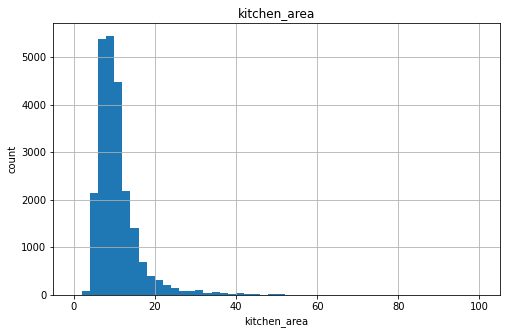

count    23441.000000
mean        10.485069
std          6.005307
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [ ]:
# площадь кухни

data['kitchen_area'].hist(figsize=(8, 5), bins=50, range=(0, 100))

# Добавим подписи к графику
plt.title('kitchen_area')
plt.xlabel('kitchen_area')
plt.ylabel('count')

plt.show()

display(data['kitchen_area'].describe())

Гисторамма по параметрам площади кухни тоже попадает в нормальное распределение, медианная площадь кухни в пределах 10 кв.м., не наблюдается выбросов очень маленьких кухонь. Так кухонь менее 1 метра крайне мало, можно было бы удалить такие данные, но в выбросы они не попадают, как и крайне большие, более 100 метров.

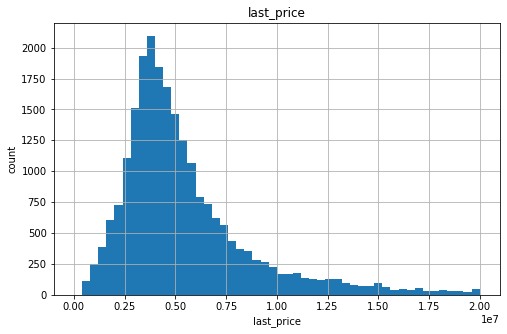

count    2.344100e+04
mean     6.535528e+06
std      1.088024e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [ ]:
# цена объекта

data['last_price'].hist(figsize=(8, 5), bins=50, range=(0, 20000000))

# Добавим подписи к графику
plt.title('last_price')
plt.xlabel('last_price')
plt.ylabel('count')

plt.show()

display(data['last_price'].describe())

Распределение цены объектов тоже выглядит нормально, нет выбросов очень дешевых квартир, менее 1 млн рублей, либо крайне дорогих, они есть на гистограмме, но число объявлений с такими квартирами единично.
В основном в представленном датафрейме квартиры снимаются с продажи с ценой в районе 4-6 млн рублей.

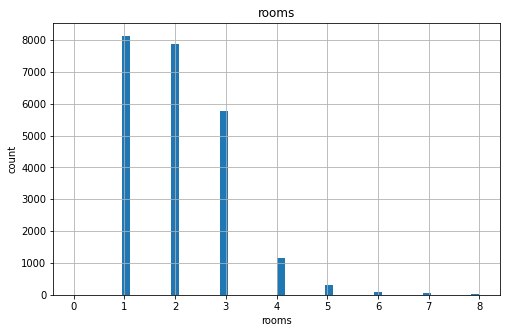

count    23441.000000
mean         2.080671
std          1.065925
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [ ]:
# количество комнат

data['rooms'].hist(figsize=(8, 5), bins=50, range=(0, 8))

# Добавим подписи к графику
plt.title('rooms')
plt.xlabel('rooms')
plt.ylabel('count')

plt.show()


display(data['rooms'].describe())

Количество комнат на графике распределено в виде одиночных столбцов, потому что мы приводили число комнат к целому значению, а также отсутствуют нулевые комнаты, мы ранее заменили их на 1, потому что нуля комнат в квартире быть не может.
В среднем в датафрейме представлено больше всего объявлений о продаже однокомнатных квартир, двухкомнатных почти столько же, трехкомнатных меньше примерно в полтора раза, а квартиры 4 и более комнат выкладываются на продажу гораздо реже.

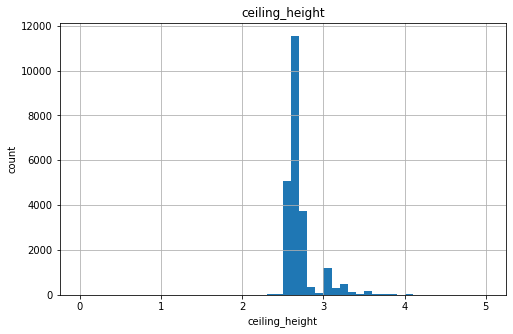

count    23441.000000
mean         2.698137
std          0.235527
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [ ]:
# высота потолков

data['ceiling_height'].hist(figsize=(8, 5), bins=50, range=(0, 5))

# Добавим подписи к графику
plt.title('ceiling_height')
plt.xlabel('ceiling_height')
plt.ylabel('count')

plt.show()

display(data['ceiling_height'].describe())

Распределение высоты потолков выглядит на гистограмме тоже правдоподобно, мы исключили потолки менее 2 м, но даже потолков с высотой 2,2 м на графике очень мало, в основной высота потолков колеблется в районе 2,6 м, потолков выше 3 метров мало, а потолки выше 4 метров встречается совсем редко в представленных данных.  

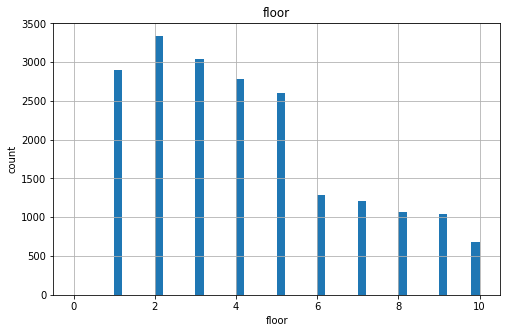

count    23441.000000
mean         5.868905
std          4.862732
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [ ]:
# этаж квартиры

data['floor'].hist(figsize=(8, 5), bins=50, range=(0, 10))

# Добавим подписи к графику
plt.title('floor')
plt.xlabel('floor')
plt.ylabel('count')

plt.show()


display(data['floor'].describe())

Этаж квартиры в данных чаще всего представлен второй, также немало квартир продается на 1,3,4 и 5 этажах. А вот квартиры выше 6 этаже выставляются на продажу гораздо слабее, квартир выше 9 этажа совсем мало.

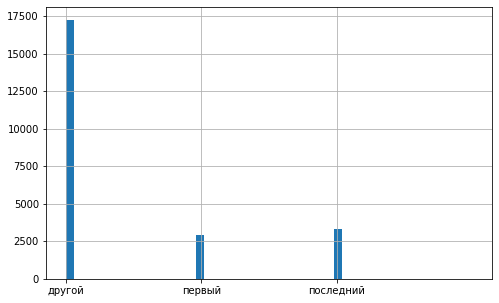

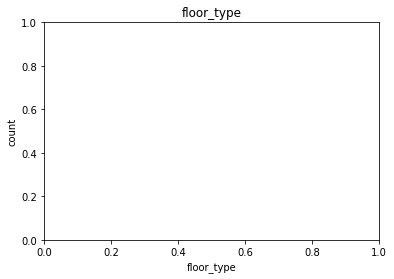

count      23441
unique         3
top       другой
freq       17242
Name: floor_type, dtype: object

In [ ]:
# тип этажа квартиры («первый», «последний», «другой»)

data['floor_type'].hist(figsize=(8, 5), bins=50, range=(0, 3))
plt.show()

# Добавим подписи к графику
plt.title('floor_type')
plt.xlabel('floor_type')
plt.ylabel('count')

plt.show()

display(data['floor_type'].describe())

Чаще всего квартиры продаются на этаже, отличном от первого или последнего, таких квартир в данных подавляющее большинство.
А меньше всего квартир представлено на первом этаже, хотя их всего чуть меньше по сравнению с продажами на последнем этаже, объявлений о продаже квартир на котором также немного.

count    23441.000000
mean        10.663368
std          6.585817
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

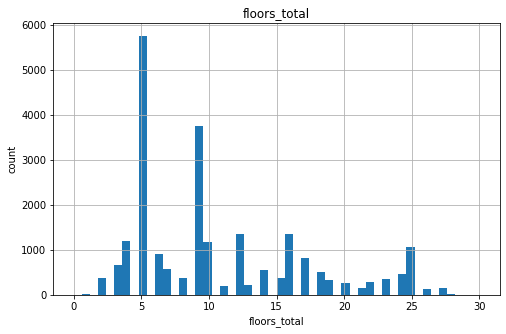

In [ ]:
# общее количество этажей в доме

data['floors_total'].hist(figsize=(8, 5), bins=50, range=(0, 30))

# Добавим подписи к графику
plt.title('floors_total')
plt.xlabel('floors_total')
plt.ylabel('count')

display(data['floors_total'].describe())

На гистограмме распределения общего числа этажей в доме наглядно видно, что есть выбросы пятиэтажек и девятиэтажек, что характерно для типовой застройки Москвы и Санкт-Петербурга. Домов малой этажности, до 3 этажа, как и высоток от 25 этажей и выше в данных представлено крайне мало.

count    17975.000000
mean     14201.024033
std       8617.196289
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

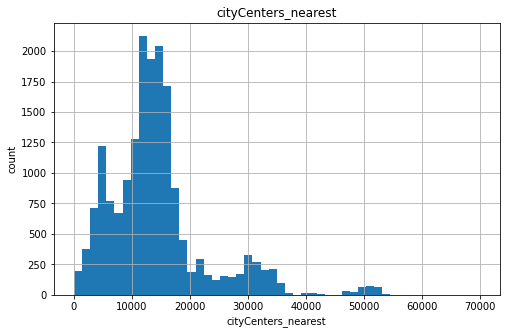

In [ ]:
# расстояние до центра города в метрах

data['cityCenters_nearest'].hist(figsize=(8, 5), bins=50, range=(0, 70000))

# Добавим подписи к графику
plt.title('cityCenters_nearest')
plt.xlabel('cityCenters_nearest')
plt.ylabel('count')

display(data['cityCenters_nearest'].describe())

Чаще всего квартиры продают на расстоянии 1-2 км от центра города, особых счастливчиков, которые живут на расстоянии менее 1 километра до центра немного, но все же больше, чем жителей, продающих квартиры на расстоянии 4 км от центра.
Интересно, что на расстоянии 5 км от центра наблюдается некоторый всплеск, возможно, это новостройки в новых районах Санкт-Петербурга и Москвы, которые только начинают застраиваться.

count    17952.000000
mean     28806.639483
std      12632.646253
min          0.000000
25%      18574.000000
50%      26763.500000
75%      37278.750000
max      84869.000000
Name: airports_nearest, dtype: float64

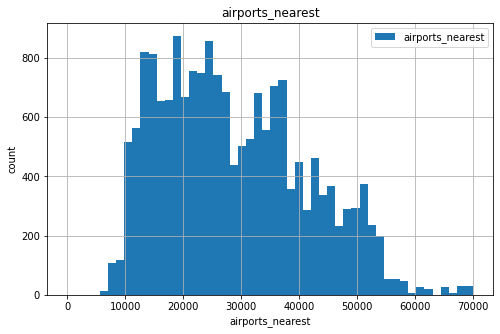

In [ ]:
# расстояние до ближайшего аэропорта

data['airports_nearest'].hist(legend='airports_nearest', figsize=(8, 5), bins=50, range=(0, 70000))

# Добавим подписи к графику
plt.title('airports_nearest')
plt.xlabel('airports_nearest')
plt.ylabel('count')

display(data['airports_nearest'].describe())

Большинство квартир в представленных объявлений расположены на расстоянии 2-3 км от аэропорта, крайне мало людей живут вблизи аэропорта на расстоянии 1 км, и еще меньше продают свои квартиры очень далеко от аэропорта, на расстоянии свыше 6 км.

count    7991.000000
mean      490.920786
std       341.351749
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

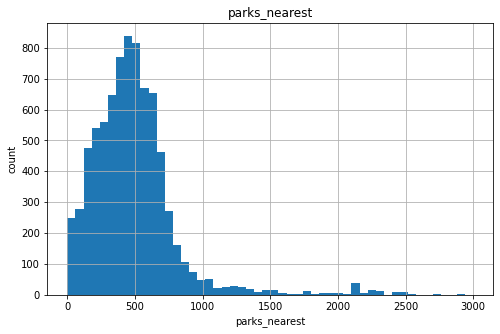

In [ ]:
# расстояние до ближайшего парка

data['parks_nearest'].hist(figsize=(8, 5), bins=50, range=(0, 3000))

# Добавим подписи к графику
plt.title('parks_nearest')
plt.xlabel('parks_nearest')
plt.ylabel('count')

display(data['parks_nearest'].describe())

Чаще всего квартиры, представленные в объявлениях, расположены в 400-500 метрах от ближайшего парка, есть особые счастливцы, которые живут менее чем в 300 метрах, но их меньше чем тех, кто живет дальше 600 метров от парков. Однако, почти у каждого жителя есть хоть какой-нибудь парк на расстоянии 1 км от дома, количество квартир, совсем удаленных от парков, невелико.

count    23441.000000
mean         2.568065
std          1.787872
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

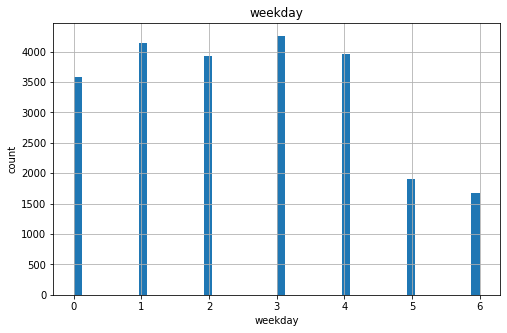

In [ ]:
# день публикации объявления

data['weekday'].hist(figsize=(8, 5), bins=50)

# Добавим подписи к графику
plt.title('weekday')
plt.xlabel('weekday')
plt.ylabel('count')

display(data['weekday'].describe())

Пик выкладывания квартир на продажу пришелся на четверг, в целом и в остальные будние дни недели объявления выкладывают на продажу часто. А вот в выходные дни, субботу и воскресенье, количество объявлений сокращается вдвое.

count    23441.000000
mean         6.401433
std          3.493537
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

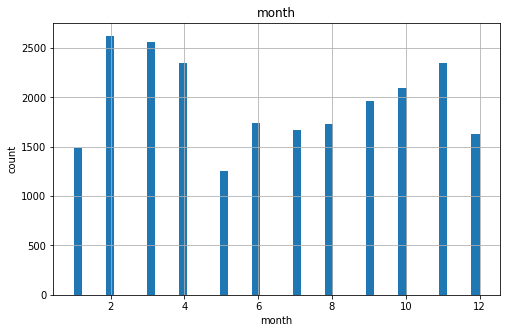

In [ ]:
#месяц публикации объявления


data['month'].hist(figsize=(8, 5), bins=50)

# Добавим подписи к графику
plt.title('month')
plt.xlabel('month')
plt.ylabel('count')

display(data['month'].describe())


Чаще всего в Москве и Санкт-Петербурге объявления о продажи квартир выкладывают в феврале, марте и апреле, а вот летом и в январские праздники наблюдается заметный спад объявлений о продаже квартир. Осенью попытки продаж начинают возрастать и к ноябрю достигают апрелького уровня.

count    20282.000000
mean       180.970861
std        219.963931
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

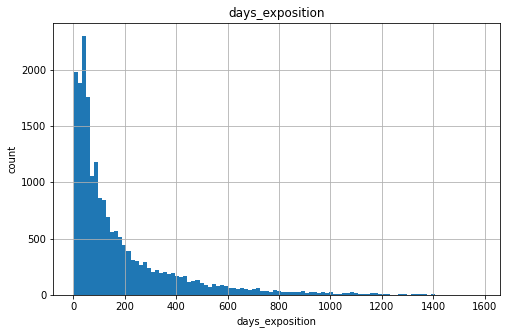

In [ ]:
# Изучим, как быстро продавались квартиры. Этот параметр показывает, сколько дней было размещено каждое объявление.
# постройте гистограмму, посмотрим на среднее и медиану.

data['days_exposition'].hist(figsize=(8, 5), bins=100)

# Добавим подписи к графику
plt.title('days_exposition')
plt.xlabel('days_exposition')
plt.ylabel('count')

display(data['days_exposition'].describe())



Обычно продажа занимает от 45 до 230 дней, в этом периоде тоже есть определенные пики в районе пятидесятого и сотого дня, но, скорее всего, они связаны с продажей квартир агентствами и одновременным снятием неактуальных объявлений.

Быстрой продажей квартиры можно считать продажу от 1 до 45 дней, крайне медленной - от 231 дня и выше.


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

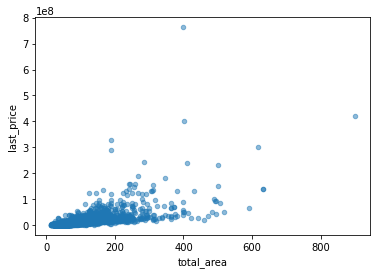

In [ ]:
#Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта?
#общая стоимость - общая площадь;


data.plot(y='last_price', x='total_area', kind='scatter', alpha=0.5)


Видна корреляция для квартир меньше 200 кв.м, а жилье с большей площадью уже не подвержено зависимости цена - общая площадь

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

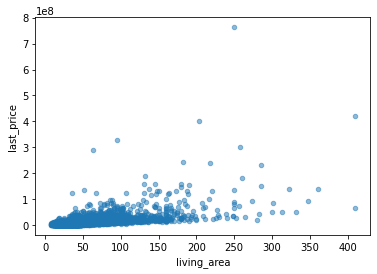

In [ ]:
#общая стоимость - жилая площадь;

data.plot(y='last_price', x='living_area', kind='scatter', alpha=0.5)

У жилой стоимости зависимость со стоимостью примерно такая же, после 100 кв.м. жилой площади начитается сильный разброс

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

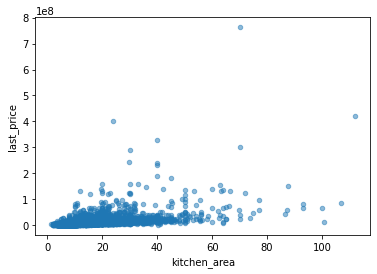

In [ ]:
#общая стоимость - площадь кухни;

data.plot(y='last_price', x='kitchen_area', kind='scatter', alpha=0.5)

Наблюдаем все тоже самое, видимо, все из-за того, что процент жилой площади и процент площади кухни относительно общей площади примерно одинаков

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

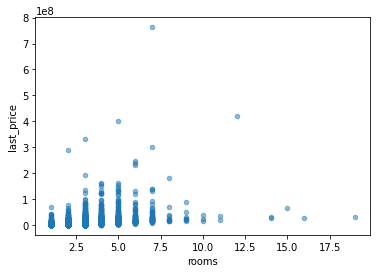

In [ ]:
#общая стоимость - количество комнат;

data.plot(y='last_price', x='rooms', kind='scatter', alpha=0.5)

In [ ]:
data[['total_area', 'last_price', 'kitchen_area', 'living_area']].corr()

,total_area,last_price,kitchen_area,living_area
total_area,1.000000,0.653332,0.662749,0.947724
last_price,0.653332,1.000000,0.515316,0.584662
kitchen_area,0.662749,0.515316,1.000000,0.502570
living_area,0.947724,0.584662,0.502570,1.000000


Особой зависимости не наблюдается, в каждой категории по количеству комнат есть выбросы относительно цены

<AxesSubplot:xlabel='floor_type'>

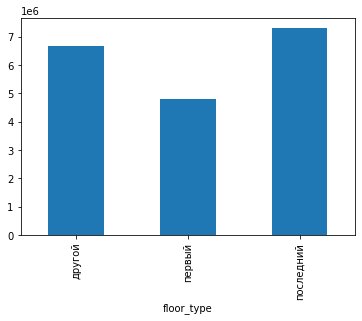

In [ ]:
#общая стоимость - этажа, на котором расположена квартира (первый, последний, другой);
#display(data)

data.groupby('floor_type')['last_price'].mean().plot.bar()



Дороже всего стоят квартиры на последнем этаже доме, а дешевле всего - на первом, все ожидаемо.

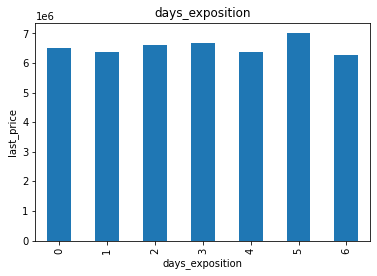

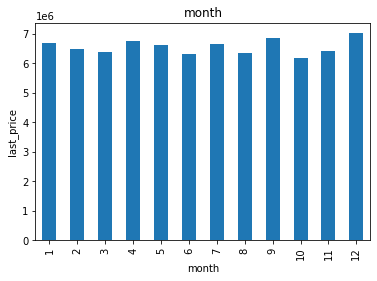

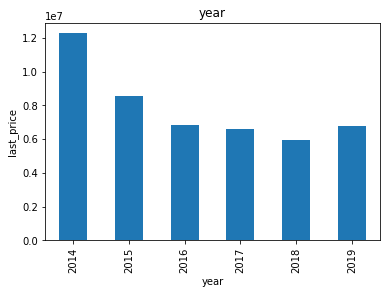

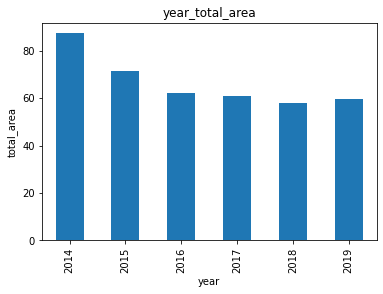

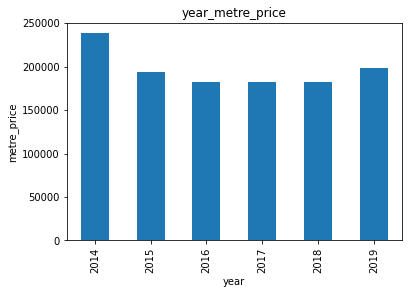

In [ ]:
#общая стоимость - даты размещения (день недели, месяц, год);

data.groupby('weekday')['last_price'].mean().plot.bar()

# Добавим подписи к графику
plt.title('days_exposition')
plt.xlabel('days_exposition')
plt.ylabel('last_price')
plt.show()


data.groupby('month')['last_price'].mean().plot.bar()

# Добавим подписи к графику
plt.title('month')
plt.xlabel('month')
plt.ylabel('last_price')
plt.show()


data.groupby('year')['last_price'].mean().plot.bar()

# Добавим подписи к графику
plt.title('year')
plt.xlabel('year')
plt.ylabel('last_price')
plt.show()

#построим зависимости от года - к цене площади; от года - к цене одного метра

data.groupby('year')['total_area'].mean().plot.bar()

# Добавим подписи к графику
plt.title('year_total_area')
plt.xlabel('year')
plt.ylabel('total_area')
plt.show()

data.groupby('year')['metre_price'].mean().plot.bar()
# Добавим подписи к графику
plt.title('year_metre_price')
plt.xlabel('year')
plt.ylabel('metre_price')
plt.show()


Зависимости от дня или месяца размещения не наблюдается, а вот год размещения существенно влиял на стоимость - так, самые дорогие квартиры продавались в 2014 году, дальше до 2018 год шел спад, а в 2019 году начался некоторый рост на стоимость жилья, однако, на уровне только половины цен 2014 года. При этом с 2014 года наблюдается еще и спад площади продаваемых квартир.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Выделиv населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name



In [ ]:
data10 = data.groupby('locality_name').count().sort_values(by = 'metre_price', ascending=False).head(10)

for l in data10.index:
    display(l, data[data['locality_name'] == l]['metre_price'].mean().round(0))

#создадим списки для графика визуализации

x = [] #создадим списки для графика визуализации
y = []

# напишем цикл, который пройдется по каждой строке датафрейма, сократит кол-во знаков


'Санкт-Петербург'

213462.0

'поселок Мурино'

171951.0

'поселок Шушары'

154525.0

'Всеволожск'

132899.0

'Пушкин'

191001.0

'Колпино'

132343.0

'поселок Парголово'

197165.0

'Гатчина'

122259.0

'деревня Кудрово'

185199.0

'Выборг'

99453.0

In [ ]:
display(data.groupby('locality_name')['metre_price'].mean().sort_values(ascending=False).head(5))
display(data.groupby('locality_name')['metre_price'].mean().sort_values(ascending=True).head(5))
#by='median_time'

locality_name
садовое товарищество Новая Ропша    250000.000000
Зеленогорск                         218860.191692
Санкт-Петербург                     213462.425549
Кудрово                             206548.206946
Сестрорецк                          198717.273746
Name: metre_price, dtype: float64

locality_name
деревня Малая Романовка    14808.362369
деревня Старополье         18523.657980
деревня Выскатка           18856.907895
поселок станции Свирь      18973.070562
деревня Вахнова Кара       20470.626958
Name: metre_price, dtype: float64

Среди десяти населенных пунктов с бОльшим числом объявлений в датафрейме, самая высокая цена квадратного метра в Санкт-Петербурге и она составляет 213 тыс. за кв. м., а самая низкая - в Выборге, где цена квадратного метра составляет 99 тыс. за кв.м.

Ранее мы посчитали расстояние до центра в километрах.
Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишим, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='cityCenters_km'>

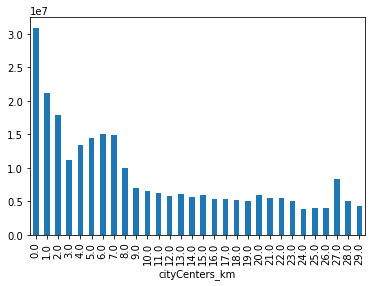

In [ ]:
#cityCenters_km
#last_price
data['price_per_km'] = data['last_price'] / data['cityCenters_km']

data[data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_km')['last_price'].mean().plot.bar()

Наблюдается явная зависимость цены квартра от расстояния до центра города - чем ближе квартира к центру, тем выше стоимость квадратного метра жилья.

### Итоговые наблюдения

Исследование архива объявлений за 2014-2019 годы о продаже квартир в Санкт-Петербурге и соседних населённых пунктах завершено.

Отметим интересные особенности и зависимости, которые существовали на рынке недвижимости в рассматриваемый период.

Портрет наиболее характерного для исследуемого датафрейма объекта недвижимости получился следующий:

это квартира 50-60 кв.м., с жилой площадью около 34 кв.м., площадью кухни в пределах 10 кв.м. и ценой в районе 4-6 млн рублей.
Скорее всего это однокомнатная или двухкомнатная квартира, с потолком около 2,6 м, которая находится на 2 этаже пятиэтажного дома.
Дом расположен на расстоянии 1-2 км от центра города и 2-3 км от аэропорта, а также в пределах 500 м от квартиры есть парк.
Вероятно, что объвление о продаже квартиры выложили в какой-нибудь из четвергов февраля, а продавали ее около 180 дней.

Зависимость цены от общей, жилой или площади кухни квартир прямая, а вот зависимости от дня или месяца размещения не наблюдается, тогда как год размещения существенно влиял на стоимость - так, самые дорогие квартиры продавались в 2014 году, дальше до 2018 год шел спад цен, а в 2019 году начался некоторый рост на стоимость жилья, однако, на уровне только половины цен 2014 года. При этом с 2014 года наблюдается еще и спад площади продаваемых квартир.


Дороже всего стоят квартиры на последнем этаже доме, а дешевле всего - на первом, все ожидаемо.


Среди десяти населенных пунктов с бОльшим числом объявлений в датафрейме самая высокая цена квадратного метра -  в Санкт-Петербурге и она составляет 213 тыс. за кв. м., а самая низкая - в Выборге, где цена квадратного метра около 99 тыс. за кв.м.

Наблюдается явная зависимость цены квартиры от расстояния до центра города - чем ближе квартира к центру, тем выше стоимость квадратного метра жилья.


При исследовании были обнаружены пропуски, на некоторых из которых хочется остановиться подробнее:


обычно причинами пропуска в данных являются человеческий фактор, технический сбой, появление пропусков может быть связано со значениями в других столбцах либо пропуск зависит от значений собственного столбца.

На основании полученных данных, можно сделать вывод о том, что пропуски в столбцах связаны с:

со значениями собственного столбца:

is_apartment - апартаменты (булев тип) - не заполняется, потому что нет четких рекомендаций при заполнении формы - указывать ли значение либо оставлять пропуск, возможно необходимо дополнить форму столбцом с выбором одного обязательного значения из перечисленных;

со значениями других столбцов:

в столбце balcony скорее всего не указали количество балконов в связи с их отсутствием, однако, этого нельзя точно утверждать, потому как и в однокомнатных квартирах бывают балконы, так и весь дом может быть без балконов, при том, что там есть разные планировки, как 1-2-3-4-комнатные квартиры, но все без балконов. Возможно, необходимо дополнить форму столбцом с выбором обязательного числового значения балконов, в котором будет присутствовать и 0 как значение.

в столбцах living_area (жилая площадь) и kitchen_area (площадь кухни) площадь значений однозначно будет меньше общей площади квартиры, здесь, скорее всего, человек не располагает при заполнении точными сведениями, поэтому предпочитает оставить это поле пустым, тогда как можно предложить ему вариант площади, рассчитанный по медиане заполненных значений.

так и в столбце ceiling_height (высота потолков) - аналогичная ситуация, возможно, будет уместным добавить в форму минимальное значение 2м, значение, утвержденное в регионе по СанПину, максимальное значение в 4м или графу иное с числовым форматом, где человеком будут указаны какие-то нестандартные варианты.

столбцы locality_name (наименование населенного пункта), airports_nearest (расстояние до ближайшего аэропорта), cityCenters_nearest (расстояние до центра города), parks_around3000 (число парков в радиусе 3 км), parks_nearest (расстояние до ближайшего парка), ponds_around3000 (число водоёмов в радиусе 3 км), ponds_nearest (расстояние до ближайшего водоёма) - географические, здесь возможна привязка к карте, на которой будет нанесены все указанные объекты, для автоматического рассчета показателей исходя из заполненного адреса (адреса тоже при этом придется выбирать только из имеющегося списка), потому что при заполнении объявления человеку самостоятельно очень долго рассчитывать по карте такие значения и проще пропустить, однако, на ценник квадратного метра данные показатели могут влиять.

в стоблце days_exposition (сколько дней было размещено объявление (от публикации до снятия) - скорее всего пропуски связаны с техническим сбоем, потому что форма заполняется автоматически, очень сомнительно, что при снятии объявления продавца спрашивают, сколько дней он продавал квартиру и имеется возможность поставить рандомное число. Поэтому необходимо выяснить у отдела разработки причины такого технического сбоя.

Также в некоторых столбцах пришлось заменить тип данных:

first_day_exposition — дата публикации - указан тип данных int64 - заменим на datetime - чтобы разделить дату и время;

days_exposition — сколько дней было размещено объявление (от публикации до снятия) - заменим на datetime - чтобы разделить дату и время;

floors_total - всего этажей в доме - указан тип данных float64 - заменим на int64 - число этажей не может быть не целым

balcony - количество балконов - указан тип данных float64 - заменим на int64 - число этажей не может быть не целым

is_apartment - апартаменты(булев тип) - указан тип данных object - заменим на bool - позволит выбрать из двух вариантов


Отметим редкие и выбивающиеся значения, которые были обнаружены.

В столбце с видами населенных пунктов не хватает единообразия или привязки к встроенной карте, заменили ё на е для улучшения читаемости + чтобы анализировать эти виды поселков как одинаковые.

В столбце высота потолков значения приведены к разумным, если высота потолка была больше или равна 10м - разделили значения на на 10, скорее всего техническая ошибка, если высота потолка была меньше или равна 2 м - записали как Nan и удалили, потому что точная информация неизвестна, а имеющаяся противоречит здравому смыслу.

В столбце количество комнат были значения, равные 0, такого кол-ва комнат быть не может, заменили на 1.

В столбце жилая площадь были минимальные значения в 2 м, проверили, сколько строчек до разумного минимума жилой площади студии в 7 м, таких строчек оказалось всего 8, их удалили.
